In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
beer_df = pd.read_csv('../quarterly-beer-production-in-aus-March 1956-June 1994.csv')
beer_df.head(10)

,Quarter,Quarterly beer production in Australia: megalitres. March 1956 ? June 1994
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0
5,1957Q2,227.9
6,1957Q3,236.1
7,1957Q4,320.4
8,1958Q1,271.9
9,1958Q2,232.8


In [12]:
print('Shape of the dataframe: ', beer_df.shape)

Shape of the dataframe:  (155, 2)


In [4]:
beer_df.rename(columns={'Quarterly beer production in Australia: megalitres. March 1956 ? June 1994': 'Beer_Prod'}, inplace = True)

In [5]:
beer_df.head()

,Quarter,Beer_Prod
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


In [ ]:
#Remove missing values
missing = (pd.isnull(beer_df['Quarter'])) | (pd.isnull(beer_df['Beer_Prod']))
print('Number of rows with at least one missing values:', missing.sum())
beer_df = beer_df.loc[~missing, :]
print('Shape after removing missing values:', beer_df.shape)

In [14]:
#Remove missing values
missing = (beer_df['Quarter'].isnull() )| (pd.isnull(beer_df['Quarter']))
print('Number of rows with at least one missing values: ', missing.sum())
beer_df = beer_df.loc[~missing, :]
print('Shape after removing missing values:', beer_df.shape)

Number of rows with at least one missing values:  0
Shape after removing missing values: (155, 2)


In [15]:
MA4 = beer_df['Beer_Prod'].rolling(window = 4).mean()
TwoXMA4 = MA4.rolling(window = 2).mean()
TwoXMA4 = TwoXMA4[TwoXMA4.notnull()]

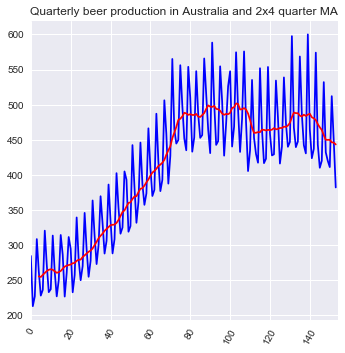

In [18]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(1, 1, 1)
beer_df['Beer_Prod'].plot(ax = ax, color = 'b', linestyle = '-')
TwoXMA4.plot(ax = ax , color = 'r', linestyle = '-')
plt.xticks(rotation = 60)
ax.set_title('Quarterly beer production in Australia and 2x4 quarter MA')

In [19]:
# Residuals
residuals = beer_df['Beer_Prod'] - TwoXMA4
residuals = residuals[residuals.notnull()]

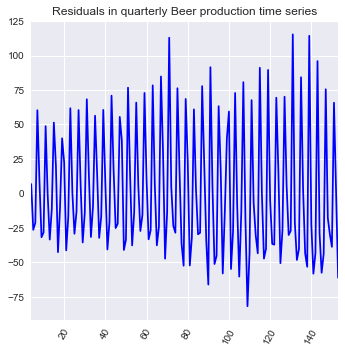

In [21]:
#Let's plot the residuals
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(1,1,1)
residuals.plot(ax = ax , color = 'b', linestyle='-')
plt.xticks(rotation = 60)
ax.set_title('Residuals in quarterly Beer production time series')

In [22]:
from pandas.plotting import autocorrelation_plot

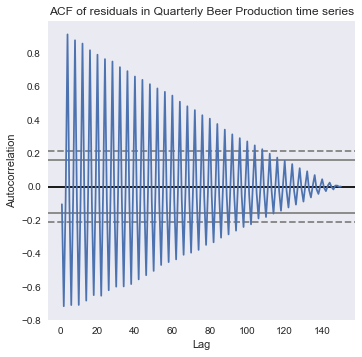

In [25]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(1,1,1)
autocorrelation_plot(residuals, ax= ax)
ax.set_title('ACF of residuals in Quarterly Beer Production time series')

In [26]:
residuals_qtr_diff = residuals.diff(4)
residuals_qtr_diff = residuals_qtr_diff[residuals_qtr_diff.notnull()]

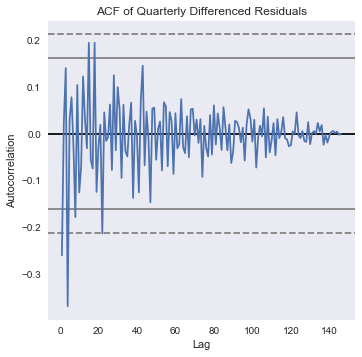

In [28]:
fig = plt.figure(figsize = (5.5, 5.5))
ax = fig.add_subplot(1,1,1)
autocorrelation_plot(residuals_qtr_diff, ax = ax)
ax.set_title('ACF of Quarterly Differenced Residuals')